# SQL Database_Sprint1

#### - Exercise 1
From the attached documents (structure and data), create a database with MySQL. It shows the main features of the created schema and explains the different tables and variables in it.



#### - Exercise 2
Run the following query on the newly created database: 

You must obtain the name, country and date of birth of those persons for whom there is no date of death and order the data from the oldest person to the youngest person.



#### - Exercise 3
Run the following query on the newly created database: 

You need to get the genre name and the total number of movies in that genre and sort it in descending order of total number of movies.  



#### - Exercise 4

Run the following query on the newly created database: 

You need to get, for each person, their name and the maximum number of different roles they have had in the same movie. 

Subsequently, it only shows those people who have assumed more than one role in the same film.

#### - Exercise 5
Perform the following operation on the newly created database: 

You must create a new genre called "Documentary" which has the number 69 as its identifier.



#### - Exercise 6
Do the following operation on the newly created database:  

Remove the movie "La Gran Familia Española" from the database.



#### - Exercise 7

Perform the following operation on the newly created database: 

Change the genre of the film "Ocho apellidos catalanes" so that it is recorded as a comedy and not as a romance.



#### - Exercise 1


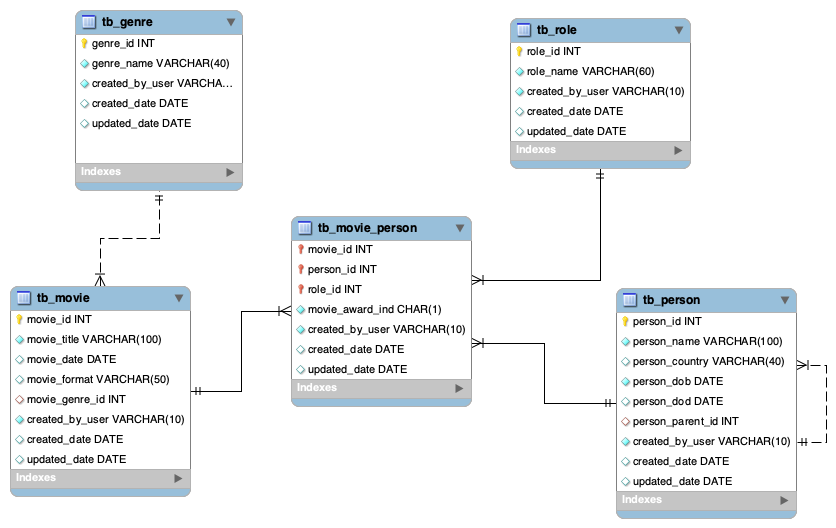

The SQL database counts with 5 tables. Some of these are connected, using connector keys: primary keys and foreign keys. One table can contain maximun one primary key and many foreign keys if needed, as we can see on the tb_movie_person. The table tb_movie_person is a table that has a principal scope to connect the information from the other tables.

Comment the database.

#### Connect MySQL to Python

In [ ]:
pip install mysql-connector-python

In [1]:
import mysql.connector

In [2]:
#connect to MySQL database with connector
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="rasta"
  #database="mydatabase" with this command we can acces to a already created database but we will use it below as an ex.
)

mycursor = mydb.cursor()

#cheking for available schemas
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

print(mydb)



('information_schema',)
('movies_diagram',)
('mysql',)
('performance_schema',)
('PruebaTecnica',)


In [3]:
#select the database
mycursor.execute("USE movies_diagram")

#### Cheking the db connection and how SQL queries works using Python.

In [4]:
query = "SELECT * from tb_genre;"

In [5]:
mycursor.execute(query)
mycursor.fetchall()



[(1, 'Acción', 'OS_SGAD', None, None),
 (2, 'Ciencia Ficción', 'OS_SGAD', None, None),
 (3, 'Comedia', 'OS_SGAD', None, None),
 (4, 'Drama', 'OS_SGAD', None, None),
 (5, 'Fantasía', 'apermag', None, None),
 (6,
  'Melodrama',
  'apermag',
  datetime.date(2018, 9, 1),
  datetime.date(2018, 9, 27)),
 (7, 'Musical', 'OS_SGAD', None, None),
 (8, 'Romance', 'OS_SGAD', None, None),
 (9, 'Suspense', 'OS_SGAD', None, None),
 (10, 'Terror', 'OS_SGAD', None, None),
 (11, 'Bélico', 'OS_SGAD', None, None),
 (69, 'Documentary', 'OS_SGAD', None, None)]

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
df1 = pd.read_sql_query(query, mydb)


df1

/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,genre_id,genre_name,created_by_user,created_date,updated_date
0,1,Acción,OS_SGAD,None,None
1,2,Ciencia Ficción,OS_SGAD,None,None
2,3,Comedia,OS_SGAD,None,None
3,4,Drama,OS_SGAD,None,None
4,5,Fantasía,apermag,None,None
5,6,Melodrama,apermag,2018-09-01,2018-09-27
6,7,Musical,OS_SGAD,None,None
7,8,Romance,OS_SGAD,None,None
8,9,Suspense,OS_SGAD,None,None
9,10,Terror,OS_SGAD,None,None


#### - Exercise 2
Run the following query on the newly created database:

You must obtain the name, country and date of birth of those persons for whom there is no date of death and order the data from the oldest person to the youngest person.

In [8]:
query2 = "SELECT person_name,person_country, person_dob FROM movies_diagram.tb_person\
    WHERE person_dod is null ORDER BY person_dob DESC"

In [9]:
mycursor.execute(query2)
mycursor.fetchall()

[('Max Sheen', 'United States', datetime.date(2009, 5, 1)),
 ('Bob Sheen', 'United States', datetime.date(2009, 5, 1)),
 ('Lola Sheen', 'United States', datetime.date(2005, 6, 1)),
 ('Sam Sheen', 'United States', datetime.date(2004, 3, 9)),
 ('Paula Jones-Sheen', 'United States', datetime.date(2003, 7, 6)),
 ('Patrick Criado', 'Spain', datetime.date(1995, 9, 23)),
 ('Clara Lago', 'Spain', datetime.date(1986, 4, 17)),
 ('Paloma Rae Estevez', 'United States', datetime.date(1986, 2, 15)),
 ('Paula Speert Sheen', 'United States', datetime.date(1986, 1, 6)),
 ('Dani Rovira', 'Spain', datetime.date(1984, 7, 1)),
 ('Taylor Levi Estevez', 'United States', datetime.date(1984, 6, 22)),
 ('Veronica Echegui', 'Spain', datetime.date(1983, 3, 14)),
 ('Quim Gutierrez', 'Spain', datetime.date(1981, 3, 27)),
 ('Daniel Sanchez Arevalo', 'Spain', datetime.date(1970, 6, 8)),
 ('Robert Alamo', 'Spain', datetime.date(1970, 5, 6)),
 ('Catherine Zeta-Jones', 'Wales', datetime.date(1969, 9, 25)),
 ('Reneé Este

In [10]:
df2 = pd.read_sql_query(query2, mydb)


df2

/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,person_name,person_country,person_dob
0,Max Sheen,United States,2009-05-01
1,Bob Sheen,United States,2009-05-01
2,Lola Sheen,United States,2005-06-01
3,Sam Sheen,United States,2004-03-09
4,Paula Jones-Sheen,United States,2003-07-06
5,Patrick Criado,Spain,1995-09-23
6,Clara Lago,Spain,1986-04-17
7,Paloma Rae Estevez,United States,1986-02-15
8,Paula Speert Sheen,United States,1986-01-06
9,Dani Rovira,Spain,1984-07-01


#### - Exercise 3
Run the following query on the newly created database:

You need to get the genre name and the total number of movies in that genre and sort it in descending order of total number of movies.

In [11]:
query3 = "SELECT genre_name, COUNT(movie_genre_id) AS Counts\
    FROM movies_diagram.tb_genre INNER JOIN movies_diagram.tb_movie ON  movie_genre_id = genre_id\
    GROUP BY genre_name\
    ORDER BY Counts DESC;"

In [12]:
mycursor.execute(query3)
mycursor.fetchall()

[('Comedia', 3),
 ('Acción', 2),
 ('Ciencia Ficción', 2),
 ('Drama', 2),
 ('Suspense', 2),
 ('Fantasía', 1),
 ('Romance', 1),
 ('Terror', 1),
 ('Bélico', 1)]

In [13]:
df3 = pd.read_sql_query(query3, mydb)


df3

/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,genre_name,Counts
0,Comedia,3
1,Acción,2
2,Ciencia Ficción,2
3,Drama,2
4,Suspense,2
5,Fantasía,1
6,Romance,1
7,Terror,1
8,Bélico,1


#### - Exercise 4
Run the following query on the newly created database:

You need to get, for each person, their name and the maximum number of different roles they have had in the same movie.

Subsequently, it only shows those people who have assumed more than one role in the same film.

In [23]:
query4 = "USE movies_diagram\
    SELECT tb_person.person_name, tb_movie.movie_title, COUNT(tb_role.role_id) AS N_roles\
    FROM tb_movie_person\
    INNER JOIN tb_person  ON tb_person.person_id = tb_movie_person.person_id\
    INNER JOIN tb_movie ON tb_movie.movie_id = tb_movie_person.movie_id\
    INNER JOIN tb_role ON tb_role.role_id = tb_movie_person.role_id\
    GROUP BY  tb_person.person_name, tb_movie.movie_title HAVING (N_roles) > 1\
    ORDER BY N_roles DESC;"

In [24]:
mycursor.execute(query4)
mycursor.fetchall()

[('Alfred Joseph Hitchcock', 'Psycho', 3),
 ('Francis Ford Coppola', 'Apocalypse Now', 3),
 ('George Lucas', 'Indiana Jones and the Temple of Doom', 2),
 ('Mel Gibson', 'Braveheart', 2),
 ('Steven Spielberg', 'The Terminal', 2)]

#### - Exercise 5
Perform the following operation on the newly created database:

You must create a new genre called "Documentary" which has the number 69 as its identifier.

In [16]:
query5 = "INSERT INTO movies_diagram.tb_genre (genre_id,genre_name) VALUES (69,'Documentary')"
     

In [17]:
query5_1 = "SELECT * from tb_genre;"

In [18]:
mycursor.execute(query5_1)
mycursor.fetchall()

[(1, 'Acción', 'OS_SGAD', None, None),
 (2, 'Ciencia Ficción', 'OS_SGAD', None, None),
 (3, 'Comedia', 'OS_SGAD', None, None),
 (4, 'Drama', 'OS_SGAD', None, None),
 (5, 'Fantasía', 'apermag', None, None),
 (6,
  'Melodrama',
  'apermag',
  datetime.date(2018, 9, 1),
  datetime.date(2018, 9, 27)),
 (7, 'Musical', 'OS_SGAD', None, None),
 (8, 'Romance', 'OS_SGAD', None, None),
 (9, 'Suspense', 'OS_SGAD', None, None),
 (10, 'Terror', 'OS_SGAD', None, None),
 (11, 'Bélico', 'OS_SGAD', None, None),
 (69, 'Documentary', 'OS_SGAD', None, None)]

#### - Exercise 6
Do the following operation on the newly created database:

Remove the movie "La Gran Familia Española" from the database.

In [ ]:
query6 = "DELETE FROM movies_diagram.tb_movie WHERE movie_id='11';"

In [ ]:
mycursor.execute(query6)

In [19]:
query6_1 = "SELECT * FROM movies_diagram.tb_movie;"


In [20]:
mycursor.execute(query6_1)
mycursor.fetchall()

[(1,
  'Apocalypse Now',
  datetime.date(1979, 5, 10),
  'Film',
  11,
  'OS_SGAD',
  None,
  None),
 (2,
  'Star Wars:Episode IV - A New Hope',
  datetime.date(1977, 5, 25),
  'Film',
  2,
  'OS_SGAD',
  None,
  None),
 (3,
  'Indiana Jones and the Temple of Doom',
  datetime.date(1984, 5, 8),
  'Film',
  1,
  'OS_SGAD',
  None,
  None),
 (4,
  'The Terminal',
  datetime.date(2004, 6, 18),
  'Digital',
  3,
  'OS_SGAD',
  None,
  None),
 (5, 'Jaws', datetime.date(1975, 1, 1), 'Film', 10, 'OS_SGAD', None, None),
 (6,
  'ET The Extraterrestrial',
  datetime.date(1982, 7, 25),
  'Film',
  5,
  'OS_SGAD',
  None,
  None),
 (7, 'Psycho', datetime.date(1960, 5, 6), 'Film', 9, 'OS_SGAD', None, None),
 (8,
  'Ocho Apellidos Vascos',
  datetime.date(2014, 3, 14),
  'Digital',
  3,
  'OS_SGAD',
  None,
  None),
 (9,
  'Ocho Apellidos Catalanes',
  datetime.date(2016, 6, 9),
  'Digital',
  3,
  'OS_SGAD',
  None,
  None),
 (10,
  'El otro lado de la cama',
  datetime.date(2002, 9, 4),
  'Digital

In [26]:
#cheking for the deleted movie
query6_2 = "SELECT movie_title FROM tb_movie WHERE movie_title = 'La Gran Familia Española';"

In [27]:
mycursor.execute(query6_2)
mycursor.fetchall()
#We can see that the selected movie was deleted correctly.

[]

#### - Exercise 7

Perform the following operation on the newly created database: 

Change the genre of the film "Ocho apellidos catalanes" so that it is recorded as a comedy and not as a romance.

In [ ]:
query7 = "USE movies_diagram\
    SELECT movie_id FROM tb_movie WHERE movie_title = 'Ocho apellidos catalanes';\
    UPDATE tb_movie\
    SET movie_genre_id = 3\
    WHERE movie_id = 9;"

In [30]:
query7_1 = "SELECT * FROM movies_diagram.tb_movie"

In [31]:
mycursor.execute(query7_1)
mycursor.fetchall()

[(1,
  'Apocalypse Now',
  datetime.date(1979, 5, 10),
  'Film',
  11,
  'OS_SGAD',
  None,
  None),
 (2,
  'Star Wars:Episode IV - A New Hope',
  datetime.date(1977, 5, 25),
  'Film',
  2,
  'OS_SGAD',
  None,
  None),
 (3,
  'Indiana Jones and the Temple of Doom',
  datetime.date(1984, 5, 8),
  'Film',
  1,
  'OS_SGAD',
  None,
  None),
 (4,
  'The Terminal',
  datetime.date(2004, 6, 18),
  'Digital',
  3,
  'OS_SGAD',
  None,
  None),
 (5, 'Jaws', datetime.date(1975, 1, 1), 'Film', 10, 'OS_SGAD', None, None),
 (6,
  'ET The Extraterrestrial',
  datetime.date(1982, 7, 25),
  'Film',
  5,
  'OS_SGAD',
  None,
  None),
 (7, 'Psycho', datetime.date(1960, 5, 6), 'Film', 9, 'OS_SGAD', None, None),
 (8,
  'Ocho Apellidos Vascos',
  datetime.date(2014, 3, 14),
  'Digital',
  3,
  'OS_SGAD',
  None,
  None),
 (9,
  'Ocho Apellidos Catalanes',
  datetime.date(2016, 6, 9),
  'Digital',
  3,
  'OS_SGAD',
  None,
  None),
 (10,
  'El otro lado de la cama',
  datetime.date(2002, 9, 4),
  'Digital

#### CONCLUSIONS:

1. SQL language is the most used with relational databases.
2. It is important to understand the design and the architecture of a database in order to submit queries that make sense. 
3. There are different ways to interact with a SQL database, some of thema are using the Command line, MySQL Workbench or integrate SQL languare directly from the Jupyter Notebook. I used these two last methods in my exercises.


#### References

Hyde and incript passwords: https://www.geeksforgeeks.org/hiding-and-encrypting-passwords-in-python/#:~:text=There%20are%20various%20Python%20modules,module%20it%20can%20be%20encrypted.

Phyton SQL connector tutorial: https://www.datacamp.com/tutorial/tutorial-how-to-execute-sql-queries-in-r-and-python